In [1]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import re
import seaborn as sb
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")





In [2]:
import pandas as pd

# Read the CSV file into DataFrame
dataset1 = pd.read_csv(r"fake_generated.csv")



# Display the resulting DataFrame
dataset1.head()


,headlines,content
0,"BREAKING: Alien Spaceship Spotted Over Delhi, ...",Eyewitnesses claim to have seen a massive UFO ...
1,Controversy Erupts as AI Becomes 12th Nominate...,Outrage ensues as rumors of an artificial inte...
2,"BJP Announces Partnership with Time Travelers,...","In a surprising move, BJP leaders reveal plans..."
3,Congress Unveils Plan for Underwater Parliamen...,"Amid environmental concerns, Congress proposes..."
4,Mumbai Man Claims to Have Invented Perpetual M...,Local inventor insists his perpetual motion ma...


In [3]:
dataset1=pd.read_csv(r"fake_generated.csv")
cols_of_interest=["headlines","content"]
fn=dataset1[cols_of_interest]
print(fn.shape)





(1042, 2)


In [4]:
print(fn.describe())


                                                headlines  \
count                                                1042   
unique                                               1042   
top     BREAKING: Alien Spaceship Spotted Over Delhi, ...   
freq                                                    1   

                                                  content  
count                                                1042  
unique                                               1042  
top     Eyewitnesses claim to have seen a massive UFO ...  
freq                                                    1  


In [6]:
fn.dropna(subset=['content','headlines'],inplace=True)
print(fn.shape)
fn.head(100)

(1042, 2)


,headlines,content
0,"BREAKING: Alien Spaceship Spotted Over Delhi, ...",Eyewitnesses claim to have seen a massive UFO ...
1,Controversy Erupts as AI Becomes 12th Nominate...,Outrage ensues as rumors of an artificial inte...
2,"BJP Announces Partnership with Time Travelers,...","In a surprising move, BJP leaders reveal plans..."
3,Congress Unveils Plan for Underwater Parliamen...,"Amid environmental concerns, Congress proposes..."
4,Mumbai Man Claims to Have Invented Perpetual M...,Local inventor insists his perpetual motion ma...
...,...,...
95,Amit Shah's Crony Capitalism: BJP Leader's Une...,"Amit Shah's shady business dealings exposed, a..."
96,BREAKING: Political scandal rocks Congress as ...,Congress manifesto committee under P Chidambar...
97,EXPOSED: BJP's secret strategy for Lok Sabha p...,Whistleblower leaks documents suggesting BJP m...
98,SHOCKING: Congress Assam chief caught on tape ...,Assam Congress leader Bhupen Borah's leaked au...


In [7]:
fn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  1042 non-null   object
 1   content    1042 non-null   object
dtypes: object(2)
memory usage: 16.4+ KB


In [8]:
df=fn
df['fakeness'] = 1
df.head(60)

,headlines,content,fakeness
0,"BREAKING: Alien Spaceship Spotted Over Delhi, ...",Eyewitnesses claim to have seen a massive UFO ...,1
1,Controversy Erupts as AI Becomes 12th Nominate...,Outrage ensues as rumors of an artificial inte...,1
2,"BJP Announces Partnership with Time Travelers,...","In a surprising move, BJP leaders reveal plans...",1
3,Congress Unveils Plan for Underwater Parliamen...,"Amid environmental concerns, Congress proposes...",1
4,Mumbai Man Claims to Have Invented Perpetual M...,Local inventor insists his perpetual motion ma...,1
5,Scandal Rocks Parliament: MPs Allegedly Caught...,Shocking footage reveals lawmakers dancing to ...,1
6,"AI Predicts Apocalypse by 2050, Urges Governme...",Artificial intelligence system warns of impend...,1
7,Nationwide Panic as Giant Sinkhole Swallows Pa...,Chaotic scenes unfold as a massive sinkhole en...,1
8,"PM Modi Reveals Plan to Colonize Mars by 2030,...",Bold announcement from the Prime Minister spar...,1
9,Exclusive: Gandhiji's Ghost Spotted at Congres...,Supernatural sighting at Congress office as pa...,1


In [9]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2) )
df=df.head(11000)
vectorizer = tdf.fit(df.content.values.astype('U'))
transformed_text = vectorizer.transform(df.content.values.astype('U'))
transformed_title = vectorizer.transform(df.headlines.values.astype('U'))

In [10]:
import numpy as np

def getTfidfTermScores(feature_names, transformed_title):
    term_corpus_dict = {}
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

# Assuming you have already defined 'tdf' and 'transformed_title'

# Get feature names
feature_names = tdf.get_feature_names_out()

# Call the function
term_corpus_dict = getTfidfTermScores(feature_names, transformed_title)




In [11]:
def getSortedTfidfScores(term_corpus_dict):
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    return termNames, scores


termNames, scores = getSortedTfidfScores(term_corpus_dict)

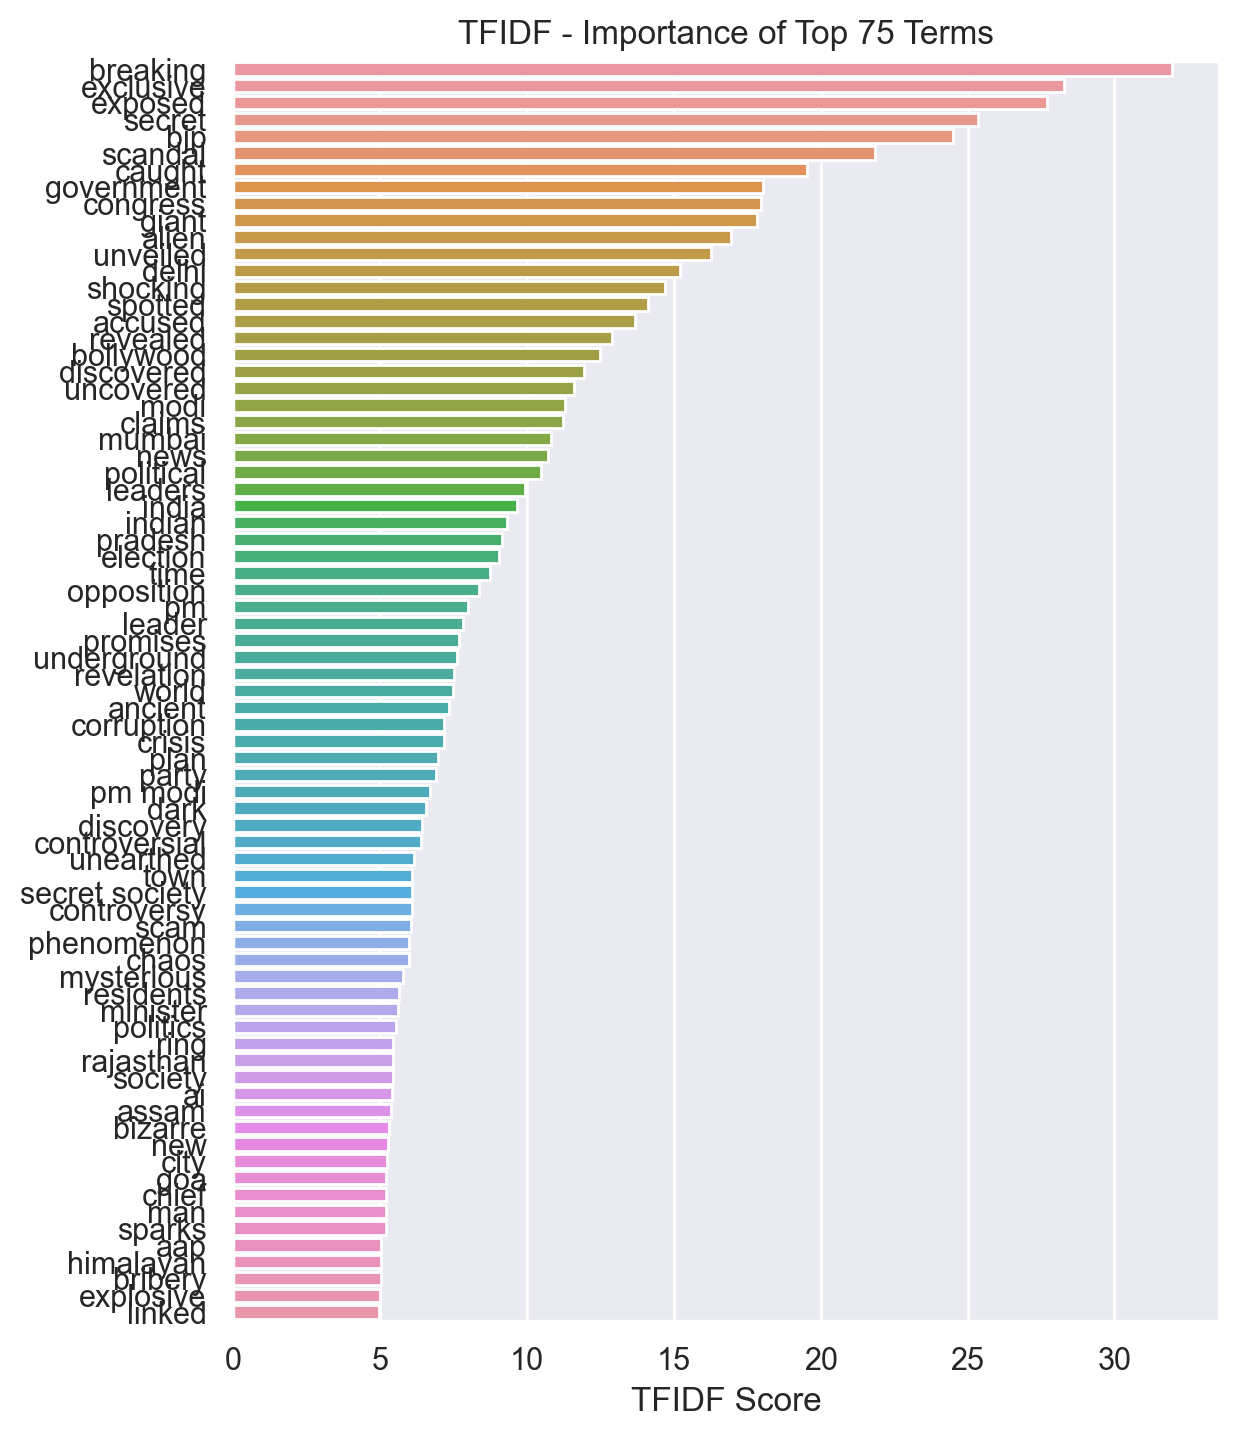

In [13]:




def plotTfidfScores(scores,termNames, n_words = 75):
    fig = plt.figure(figsize = (14, 18))
    override = {'fontsize': 'large'}
    fig.add_subplot(221)   
    n_words = 75
    sb.set()
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    plt.xlabel("TFIDF Score");




plotTfidfScores(scores, termNames,  n_words = 75)


df.to_csv("fake_cleaned.csv")
